<a href="https://colab.research.google.com/github/Darkunquie/FMML_PROJECT_2024/blob/main/Module%204%20lab-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Module 4: Perceptron and Gradient Descent**

Lab 1: Perceptron

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

In [4]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])
y = np.array([-1, -1, 1, 1, 1])

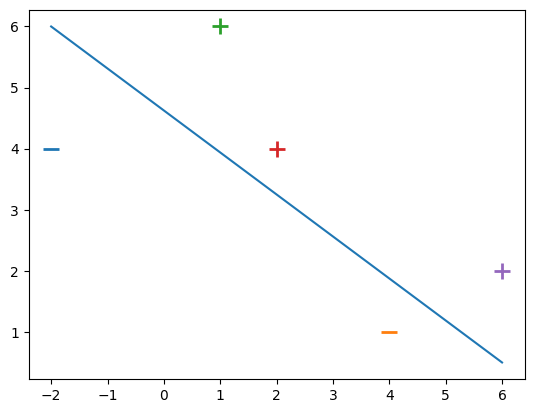

In [5]:
for d, sample in enumerate(X):
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

plt.plot([-2, 6], [6, 0.5])

Perceptron algorithm using our update rule

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

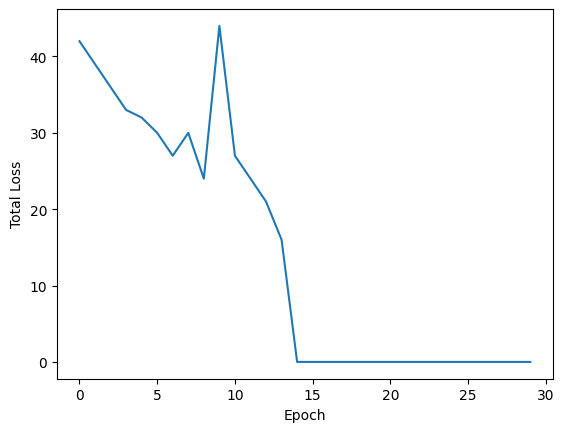

In [8]:
w = perceptron_algo_plot(X, y)

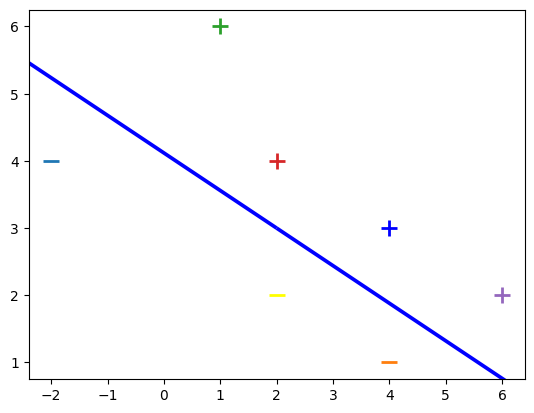

In [12]:
for d, sample in enumerate(X):

    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)


plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

##things to try:

1.
Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.

In [13]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data

--2024-08-24 13:09:41--  https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘sonar.all-data’

sonar.all-data          [ <=>                ]  85.72K  --.-KB/s    in 0.02s   

2024-08-24 13:09:41 (4.26 MB/s) - ‘sonar.all-data’ saved [87776]



In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('sonar.all-data', header=None)

encoder = LabelEncoder()
data[60] = encoder.fit_transform(data[60])

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [15]:
def perceptron_algo_plot(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    n = 100
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

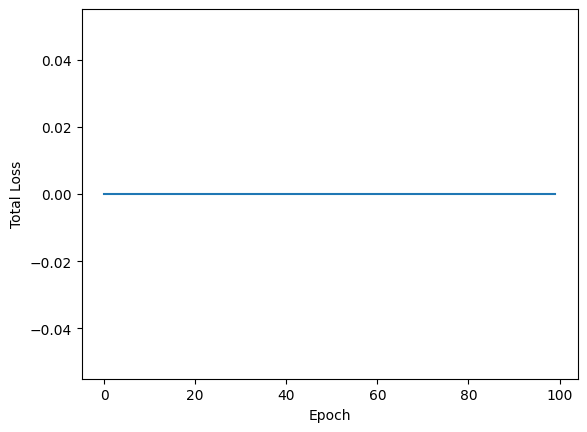

In [16]:
w = perceptron_algo_plot(X, y)

2. Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?

In [17]:
def perceptron_algo_plot(X, Y, eta, n):
    w = np.zeros(len(X[0]))
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title(f'Learning Rate: {eta}')

    return w

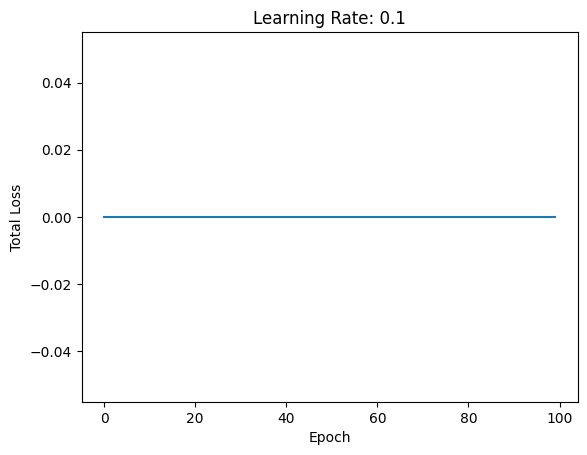

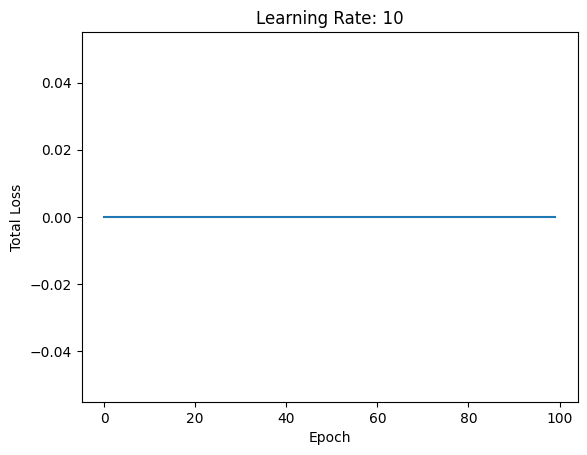

In [18]:
w = perceptron_algo_plot(X, y, 0.1, 100)
plt.show()

w = perceptron_algo_plot(X, y, 10, 100)
plt.show()

In [24]:
def perceptron_algo_plot(X, Y, eta, n):
    w = np.zeros(len(X[0]))
    errors = []

    plt.figure(figsize=(10, 6))
   # plt.plot(errors)
    plt.show()

3. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.

In [27]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [28]:
y = np.array([-1, -1, 1, -1, -1])

If you run the perceptron algorithm on this non-linearly separable dataset, you'll observe that the algorithm fails to converge. The error will not decrease consistently, and the weights will keep oscillating.

This is because the perceptron algorithm is designed to find a linear decision boundary. When the data is not linearly separable, no single straight line can perfectly classify the points. As a result, the algorithm will keep trying to adjust the weights but won't be able to find a solution that satisfies all data points.

In [30]:
print(perceptron_algo_plot(X, y, eta=0.5, n=10))

<Figure size 1000x600 with 0 Axes>

None


##Additional Critical Thinking Questions

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.

* **i) Is the dataset learnable by a Perceptron?**

Yes, this dataset representing the boolean "AND" function is linearly separable. This means we can draw a straight line (in this case, a 2D plane since we have two features) to perfectly separate the positive (+) examples from the negative (-) examples. Since Perceptrons can only learn linearly separable datasets, this one is a good fit.



**ii) Weights update procedure**

Here's how the weight update procedure would look using the Perceptron Learning Rule. Let's assume a learning rate (eta) of 1 for simplicity:

**Data:**

**x1	x2	y**

0	  0	-

0	1	-

1	0	-

1	1	+

**Initialization:**

w0 = [0, 0]
b0 = 0

**Perceptron Learning Rule:**

1. For each data point (x1, x2, y):
 * Calculate the predicted output:

In [33]:
import numpy as np

# Define x and other variables with sample values
x = np.array([1, 2, 3])  # Example input features
w = np.array([0.5, -1, 0.2])  # Example weights
b = 0.1

y_pred = np.sign(np.dot(w, x) + b)
print(y_pred)

-1.0


Update weights if prediction is incorrect (y_pred != y)

2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.


**Learnability and Linear Separability**

Remember, a Perceptron can only learn functions that are linearly separable. This means we should be able to visually separate the outputs (True/False or +/-) with a straight line on a plot where the axes represent the input bits.

**Counting Learnable Functions**

Out of the 16 possible functions, 14 are linearly separable and therefore learnable by a Perceptron.

**Non-Learnable Functions**

The two functions that are not learnable are the XOR and XNOR functions.


**XOR**

**x1	x2	y**

0	0	0

0	1	1

1	0	1

1	1	0



**XNOR**

**x1	x2	y**

0	0	1

0	1	0

1	0	0

1	1	1

